In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
with open('data/intents.json') as intent:
    data = json.load(intent)

In [3]:
tag = []
inputs = []
response = {}
for intent in data['intents']:
    response[intent['tag']] = intent['responses']
    for line in intent['patterns']:
        inputs.append(line)
        tag.append(intent['tag'])

data = pd.DataFrame({'patterns': inputs, 'tags': tag})

In [11]:
data
response

{'greetings': ['Hello!', 'Hey!', 'What can I do for you?'],
 'goodbye': ['Sad to see you go :(', 'Talk to you later', 'Goodbye!'],
 'age': ['My programmer Arya is 20 years old!'],
 'name': ['You can call me Artex!',
  "I'm Artex!",
  "I'm Artex the assistant of Arya!"],
 'shop': ['Currently I am only a chatbot, other services are to be developed by Arya!'],
 'crypto': ['You own the following coins: BTC, ETH and DAG!'],
 'stocks': ['You own the following shares: ABBV, AAPL, FB, NVDA and an ETF of the S&P 500 Index!']}

In [9]:
import string

data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))
data.head(5)

,patterns,tags
0,hello,greetings
1,hey,greetings
2,hi,greetings
3,good day,greetings
4,whats up,greetings


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

toknizer = Tokenizer(num_words = 2000)
toknizer.fit_on_texts(data['patterns'])
train = toknizer.texts_to_sequences(data['patterns'])

In [7]:
# Apply padding

from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(train)

In [8]:
# encode the output

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [9]:
input_shape = x_train.shape[1]
print(input_shape)

6


In [10]:
# define vocabulary

vocabulary = len(toknizer.word_index)
print(f' No of unique words: {vocabulary}')

output_length = le.classes_.shape[0]
print(f' Output length: {output_length}')

 No of unique words: 56
 Output length: 7


In [11]:
# create the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1, 10)(i)
x = LSTM(10, return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length, activation = "softmax")(x)
model = Model(i, x)

In [12]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [13]:
train = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
2/2 [==============================] - 3s 8ms/step - loss: 1.9431 - accuracy: 0.0606
Epoch 2/200
2/2 [==============================] - 0s 16ms/step - loss: 1.9402 - accuracy: 0.1515
Epoch 3/200
2/2 [==============================] - 0s 11ms/step - loss: 1.9382 - accuracy: 0.1515
Epoch 4/200
2/2 [==============================] - 0s 16ms/step - loss: 1.9360 - accuracy: 0.1818
Epoch 5/200
2/2 [==============================] - 0s 17ms/step - loss: 1.9338 - accuracy: 0.1818
Epoch 6/200
2/2 [==============================] - 0s 16ms/step - loss: 1.9316 - accuracy: 0.1818
Epoch 7/200
2/2 [==============================] - 0s 12ms/step - loss: 1.9296 - accuracy: 0.1818
Epoch 8/200
2/2 [==============================] - 0s 9ms/step - loss: 1.9277 - accuracy: 0.1818
Epoch 9/200
2/2 [==============================] - 0s 13ms/step - loss: 1.9259 - accuracy: 0.1818
Epoch 10/200
2/2 [==============================] - 0s 11ms/step - loss: 1.9245 - accuracy: 0.1818
Epoch 11/200
2/2 [===

Epoch 84/200
2/2 [==============================] - 0s 12ms/step - loss: 1.4502 - accuracy: 0.4545
Epoch 85/200
2/2 [==============================] - 0s 12ms/step - loss: 1.4436 - accuracy: 0.5152
Epoch 86/200
2/2 [==============================] - 0s 16ms/step - loss: 1.4371 - accuracy: 0.5455
Epoch 87/200
2/2 [==============================] - 0s 16ms/step - loss: 1.4315 - accuracy: 0.5455
Epoch 88/200
2/2 [==============================] - 0s 16ms/step - loss: 1.4255 - accuracy: 0.5455
Epoch 89/200
2/2 [==============================] - 0s 20ms/step - loss: 1.4191 - accuracy: 0.5455
Epoch 90/200
2/2 [==============================] - 0s 15ms/step - loss: 1.4141 - accuracy: 0.5758
Epoch 91/200
2/2 [==============================] - 0s 12ms/step - loss: 1.4088 - accuracy: 0.5758
Epoch 92/200
2/2 [==============================] - 0s 11ms/step - loss: 1.4040 - accuracy: 0.5758
Epoch 93/200
2/2 [==============================] - 0s 15ms/step - loss: 1.3993 - accuracy: 0.6364
Epoch 94/2

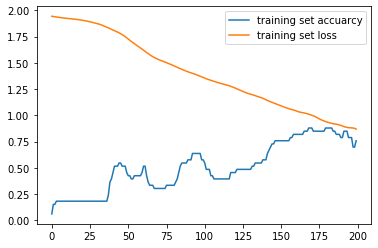

In [14]:
# Accuray

plt.plot(train.history['accuracy'], label='training set accuarcy')
plt.plot(train.history['loss'], label='training set loss')
plt.legend()

In [ ]:
# Testing
import random

while True:
    
    text_p = []
    prediction_input = input('>> ')

    # remove punctuation
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    text_p.append(prediction_input)

    # Tokenization
    prediction_input = toknizer.texts_to_sequences(text_p)
    prediction_input  = np.array(prediction_input).reshape(-1)
    prediction_input  = pad_sequences([prediction_input], input_shape)

    # Greeting
    output = model.predict(prediction_input)
    output = output.argmax()

    # finding the right tag and prediction
    response_tag = le.inverse_transform([output])[0]
    print('sam : ', random.choice(response[response_tag]))
    if response_tag == 'goodbay':
        break

>> hi
goint marry :  Talk to you later
>> whats up
goint marry :  Hey!
>> goodbay
goint marry :  Talk to you later
>> goodbay
goint marry :  Goodbye!
